# Spatial Weights



In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from libpysal import weights
from libpysal.cg.voronoi  import voronoi, voronoi_frames
import matplotlib.pyplot as plt

In [3]:
pumps = gpd.read_file('../../data/csds/snow7/pumps.shp')  #point locations of pumps
blocks = gpd.read_file('../../data/dani/polys.shp')       #polygons delineating blocks of buildings

<AxesSubplot:>

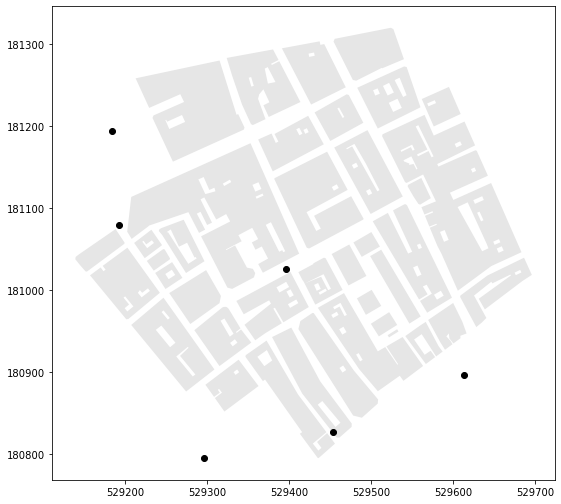

In [4]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax, color='black')

## Contiguity-Based Weights

In [5]:
pumpsW = weights.contiguity.Voronoi.from_dataframe(pumps)

In [6]:
pumpsW.neighbors

{0: [1, 3, 4, 5], 1: [0, 2, 5], 2: [1], 3: [0, 4], 4: [0, 3, 5], 5: [0, 1, 4]}

In [7]:
pumpsW.cardinalities

{0: 4, 1: 3, 2: 1, 3: 2, 4: 3, 5: 3}

In [8]:
pumpsW = weights.contiguity.Voronoi.from_dataframe(pumps, ids=pumps['name'].tolist())

In [9]:
pumpsW.neighbors

{'Broad St Pump': ['Warwick St Pump',
  'Great Malborough Pump',
  'Rupert St Pump',
  'Brewer St Pump'],
 'Great Malborough Pump': ['Broad St Pump',
  'Ramilies Place Pump',
  'Warwick St Pump'],
 'Ramilies Place Pump': ['Great Malborough Pump'],
 'Rupert St Pump': ['Broad St Pump', 'Brewer St Pump'],
 'Brewer St Pump': ['Broad St Pump', 'Warwick St Pump', 'Rupert St Pump'],
 'Warwick St Pump': ['Broad St Pump',
  'Great Malborough Pump',
  'Brewer St Pump']}

In [10]:
pumpsW.cardinalities

{'Brewer St Pump': 3,
 'Broad St Pump': 4,
 'Great Malborough Pump': 3,
 'Ramilies Place Pump': 1,
 'Rupert St Pump': 2,
 'Warwick St Pump': 3}

In [11]:
pumpsW.neighbors['Broad St Pump']

['Warwick St Pump',
 'Great Malborough Pump',
 'Rupert St Pump',
 'Brewer St Pump']

In [12]:
pumpsWmat = pd.DataFrame(*pumpsW.full())  #use .astype(int) to see ints in matrix
pumpsWmat.columns = list(pumpsWmat.index)
pumpsWmat

,Brewer St Pump,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Warwick St Pump
Brewer St Pump,0.0,1.0,0.0,0.0,1.0,1.0
Broad St Pump,1.0,0.0,1.0,0.0,1.0,1.0
Great Malborough Pump,0.0,1.0,0.0,1.0,0.0,1.0
Ramilies Place Pump,0.0,0.0,1.0,0.0,0.0,0.0
Rupert St Pump,1.0,1.0,0.0,0.0,0.0,0.0
Warwick St Pump,1.0,1.0,1.0,0.0,0.0,0.0


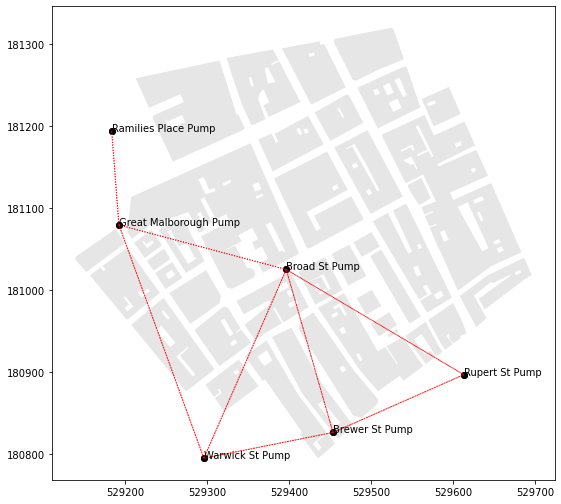

In [13]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax, color='black')
pumpsW.plot(pumps, ax=ax, indexed_on='name', 
             edge_kws=dict(color='r', linestyle=':', linewidth=1))

for index, row in pumps.iterrows():
    plt.annotate(row['name'], xy=(row['geometry'].coords[0][0],row['geometry'].coords[0][1]))  

In [14]:
points = np.vstack([pumps['x'], pumps['y']]).T  
regions_df, vertices_df = voronoi_frames(points, clip='none')

(180700.0, 181400.0)

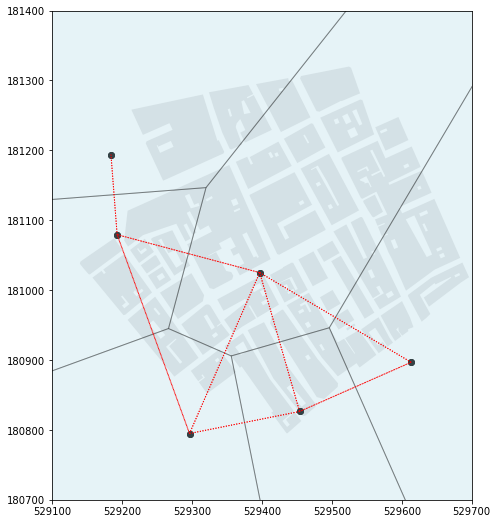

In [15]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax, color='black')
pumpsW.plot(pumps, ax=ax, indexed_on='name', 
             edge_kws=dict(color='r', linestyle=':', linewidth=1))
regions_df.plot(ax=ax, color='lightblue',edgecolor='black', alpha=0.3)

ax.set_xlim(529100,529700)
ax.set_ylim(180700,181400) 

## Distance-Based Weights <a id="dist"></a>

### K Nearest Neighbours

In [16]:
pumpsKNN3 = weights.distance.KNN.from_dataframe(pumps, k=3, ids=pumps['name'].tolist())

In [17]:
pumpsKNN3.cardinalities

{'Broad St Pump': 3,
 'Great Malborough Pump': 3,
 'Ramilies Place Pump': 3,
 'Rupert St Pump': 3,
 'Brewer St Pump': 3,
 'Warwick St Pump': 3}

In [18]:
pumpsKNN3mat = pd.DataFrame(*pumpsKNN3.full())
pumpsKNN3mat.columns = list(pumpsKNN3mat.index)
pumpsKNN3mat

,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Brewer St Pump,Warwick St Pump
Broad St Pump,0.0,1.0,0.0,0.0,1.0,1.0
Great Malborough Pump,1.0,0.0,1.0,0.0,0.0,1.0
Ramilies Place Pump,1.0,1.0,0.0,0.0,0.0,1.0
Rupert St Pump,1.0,0.0,0.0,0.0,1.0,1.0
Brewer St Pump,1.0,0.0,0.0,1.0,0.0,1.0
Warwick St Pump,1.0,1.0,0.0,0.0,1.0,0.0


(180700.0, 181400.0)

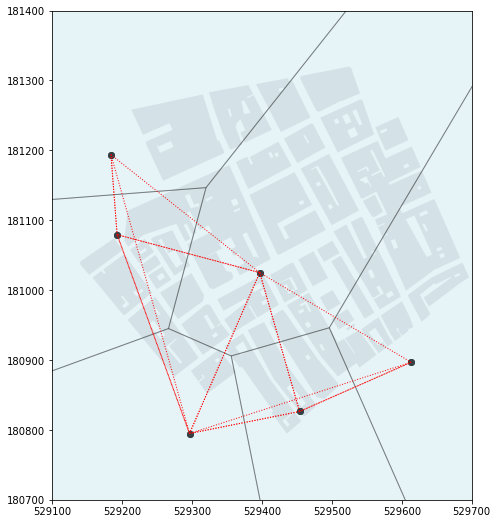

In [19]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax, color='black')

pumpsKNN3.plot(pumps, ax=ax, indexed_on='name', 
               edge_kws=dict(color='r', linestyle=':', linewidth=1))

regions_df.plot(ax=ax, color='lightblue',edgecolor='black', alpha=0.3)
ax.set_xlim(529100,529700)
ax.set_ylim(180700,181400) 

(180700.0, 181400.0)

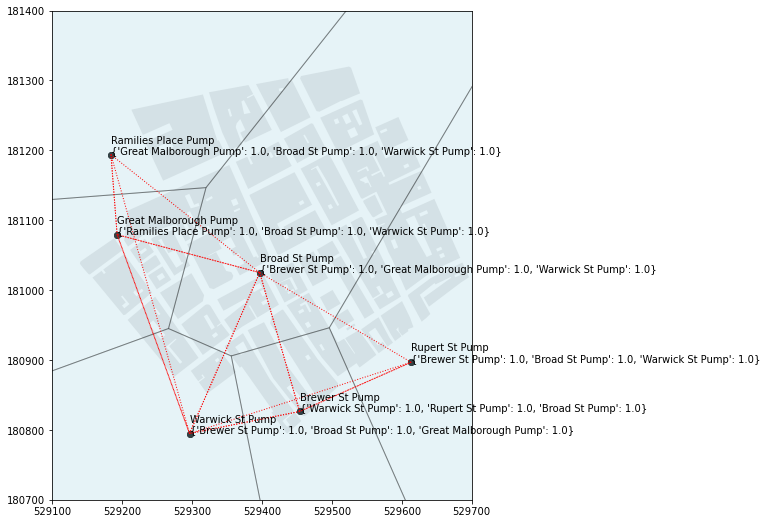

In [20]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps.plot(ax=ax, color='black')

pumpsKNN3.plot(pumps, ax=ax, indexed_on='name', 
               edge_kws=dict(color='r', linestyle=':', linewidth=1))

regions_df.plot(ax=ax, color='lightblue',edgecolor='black', alpha=0.3)

for index, row in pumps.iterrows():
    b=row['name']
    plt.annotate('{0}\n{1}'.format(b,pumpsKNN3[b]),
                 xy=(pumps.centroid[index].coords[0][0], pumps.centroid[index].coords[0][1]))

ax.set_xlim(529100,529700)
ax.set_ylim(180700,181400) 

### Kernel weights

From Binary relationships to weighted

In statistics, a [kernel](https://en.wikipedia.org/wiki/Kernel_(statistics)) is a [window function](https://en.wikipedia.org/wiki/Window_function), meaning that beyond some distance (the 'window') a weight will be zero. Within the window the weight will be defined by the kernel function. 

For observations separated by distances larger than the _bandwidth_ , the weights [are set to zero](https://geographicdata.science/book/notebooks/04_spatial_weights.html#kernel-weights).

> The default values for kernels are to use a triangular kernel with a bandwidth distance equal to the maximum knn=2 distance for all observations. The latter implies a so-called fixed bandwidth were all observations use the same distance for the cut-off.

In [21]:
pumpsK = weights.distance.Kernel.from_dataframe(pumps, function='triangular', k=2, ids=pumps['name'].tolist())

In [22]:
pumpsK.function

'triangular'

In [23]:
pumpsK.bandwidth

array([[271.53992114],
       [271.53992114],
       [271.53992114],
       [271.53992114],
       [271.53992114],
       [271.53992114]])

In [24]:
pumpsK.cardinalities   

{'Broad St Pump': 6,
 'Great Malborough Pump': 3,
 'Ramilies Place Pump': 3,
 'Rupert St Pump': 3,
 'Brewer St Pump': 4,
 'Warwick St Pump': 3}

In [25]:
pumpsKmat = round(pd.DataFrame(*pumpsK.full()),3)
pumpsKmat.columns = list(pumpsKmat.index)
pumpsKmat

,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Brewer St Pump,Warwick St Pump
Broad St Pump,1.000,0.223,0.000,0.073,0.239,0.075
Great Malborough Pump,0.223,1.000,0.578,0.000,0.000,0.000
Ramilies Place Pump,0.000,0.578,1.000,0.000,0.000,0.000
Rupert St Pump,0.073,0.000,0.000,1.000,0.357,0.000
Brewer St Pump,0.239,0.000,0.000,0.357,1.000,0.409
Warwick St Pump,0.075,0.000,0.000,0.000,0.409,1.000


In [26]:
pumpsK270 = weights.distance.Kernel.from_dataframe(pumps, function='triangular', 
                                                bandwidth=270, 
                                                ids=pumps['name'].tolist())

In [27]:
pumpsK270.bandwidth

array([[270.],
       [270.],
       [270.],
       [270.],
       [270.],
       [270.]])

In [28]:
pumpsK270.cardinalities   

{'Broad St Pump': 5,
 'Great Malborough Pump': 3,
 'Ramilies Place Pump': 2,
 'Rupert St Pump': 3,
 'Brewer St Pump': 4,
 'Warwick St Pump': 3}

In [29]:
pumpsK270mat = round(pd.DataFrame(*pumpsK270.full()),3)
pumpsK270mat.columns = list(pumpsK270mat.index)
pumpsK270mat

,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Brewer St Pump,Warwick St Pump
Broad St Pump,1.000,0.218,0.000,0.067,0.234,0.070
Great Malborough Pump,0.218,1.000,0.575,0.000,0.000,0.000
Ramilies Place Pump,0.000,0.575,1.000,0.000,0.000,0.000
Rupert St Pump,0.067,0.000,0.000,1.000,0.354,0.000
Brewer St Pump,0.234,0.000,0.000,0.354,1.000,0.405
Warwick St Pump,0.070,0.000,0.000,0.000,0.405,1.000


In [30]:
pumpsKu = weights.distance.Kernel.from_dataframe(pumps, function='uniform', ids=pumps['name'].tolist())
pumpsKumat = pd.DataFrame(*pumpsKu.full())
pumpsKumat.columns = list(pumpsKumat.index)
pumpsKumat

,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Brewer St Pump,Warwick St Pump
Broad St Pump,0.5,0.5,0.5,0.5,0.5,0.5
Great Malborough Pump,0.5,0.5,0.5,0.0,0.0,0.0
Ramilies Place Pump,0.5,0.5,0.5,0.0,0.0,0.0
Rupert St Pump,0.5,0.0,0.0,0.5,0.5,0.0
Brewer St Pump,0.5,0.0,0.0,0.5,0.5,0.5
Warwick St Pump,0.5,0.0,0.0,0.0,0.5,0.5


In [31]:
pumpsKu270 = weights.distance.Kernel.from_dataframe(pumps, function='uniform', 
                                                    bandwidth=270, ids=pumps['name'].tolist())
pumpsKu270mat = pd.DataFrame(*pumpsKu270.full())
pumpsKu270mat.columns = list(pumpsKu270mat.index)
pumpsKu270mat

,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Brewer St Pump,Warwick St Pump
Broad St Pump,0.5,0.5,0.0,0.5,0.5,0.5
Great Malborough Pump,0.5,0.5,0.5,0.0,0.0,0.0
Ramilies Place Pump,0.0,0.5,0.5,0.0,0.0,0.0
Rupert St Pump,0.5,0.0,0.0,0.5,0.5,0.0
Brewer St Pump,0.5,0.0,0.0,0.5,0.5,0.5
Warwick St Pump,0.5,0.0,0.0,0.0,0.5,0.5


In [32]:
def plotKernel(wKernel, gpDF, focal, myAx):
    
    #bins and their labels
    EQbins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    labs = []
    for i,val in enumerate(EQbins):
        if(i > 0):
            labs.append('{0}-{1}'.format(EQbins[i-1],EQbins[i]))
    
    #get the full matrix for this kernel 
    full_matrix, ids = wKernel.full() 
    full_matrix[full_matrix==0] = np.nan
    
    
    gpDF.plot(ax=myAx, facecolor='None', edgecolor='k')
    gpDF.assign(cats = pd.cut(full_matrix[ids.index(focal)],
                                    bins=EQbins, labels=labs, duplicates='drop')).plot('cats', ax=myAx,
                                                                                       cmap='viridis', alpha=0.8,
                                                           legend=True, legend_kwds={'loc': 'upper right'})
  
    #set titles
    myAx.set_title('{0}, {1}, k = {2}'.format(focal, wKernel.function, wKernel.k-1))
    myAx.get_legend().set_title("Weight")

    myAx.set_axis_off()

(180700.0, 181400.0)

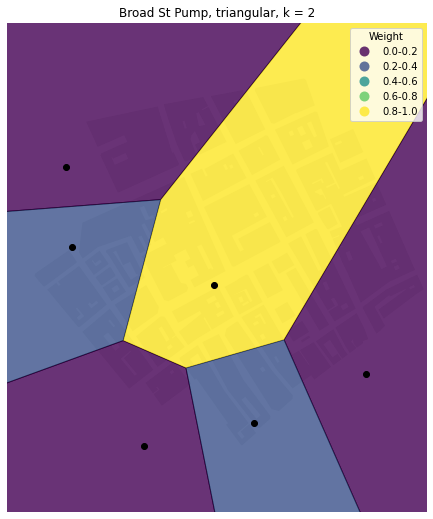

In [33]:
fig, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
plotKernel(pumpsK, regions_df, 'Broad St Pump', ax)
pumps.plot(ax=ax, color='black')
ax.set_xlim(529100,529700)
ax.set_ylim(180700,181400) 

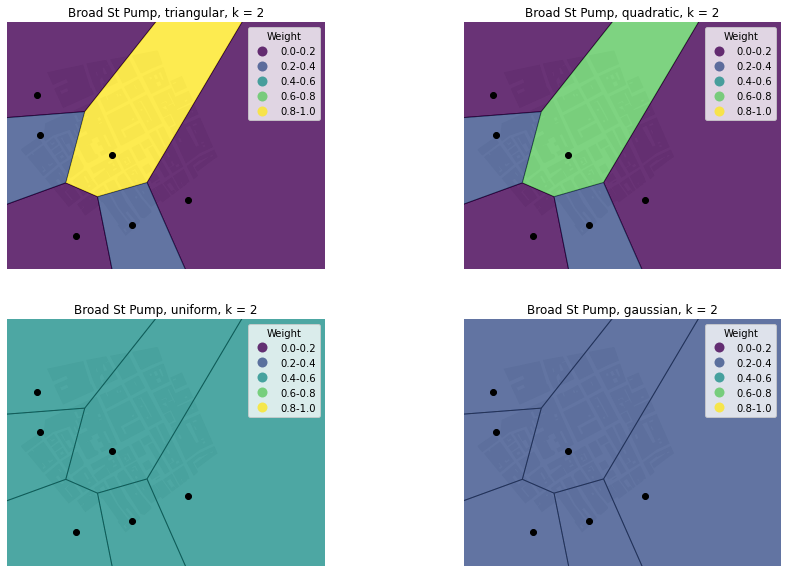

In [34]:
f, axes = plt.subplots(2,2, figsize=(15, 10))

fList = ['triangular','quadratic','uniform','gaussian']

for ax, f in zip(axes.flat, fList):
    
    blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
    
    myKernel = weights.distance.Kernel.from_dataframe(pumps, function=f, ids=pumps['name'].tolist())
    plotKernel(myKernel, regions_df, 'Broad St Pump', ax)
    
    pumps.plot(ax=ax, color='black')
    ax.set_xlim(529100,530000)
    ax.set_ylim(180700,181400) 

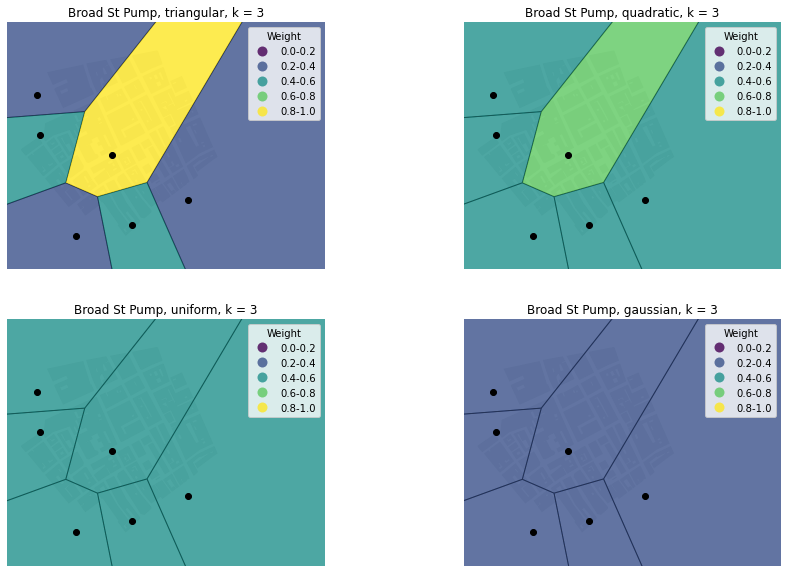

In [35]:
f, axes = plt.subplots(2,2, figsize=(15, 10))

fList = ['triangular','quadratic','uniform','gaussian']

for ax, f in zip(axes.flat, fList):
    
    blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
    
    myKernel = weights.distance.Kernel.from_dataframe(pumps, function=f, k=3, ids=pumps['name'].tolist())
    plotKernel(myKernel, regions_df, 'Broad St Pump', ax)
    
    pumps.plot(ax=ax, color='black')
    ax.set_xlim(529100,530000)
    ax.set_ylim(180700,181400) 

### Adaptive Kernel Weights


In [36]:
pumpsKa = weights.distance.Kernel.from_dataframe(pumps, function='uniform',
                                                 fixed=False,  #adaptive
                                                 k=2,
                                                 ids=pumps['name'].tolist())
pumpsKa.bandwidth

array([[211.11181865],
       [211.11181865],
       [271.53992114],
       [251.78254952],
       [174.47535058],
       [251.16864364]])

In [37]:
pumpsKa.cardinalities  #this showing k+1 because the location is included as a neighbour of itself (see matrix below)

{'Broad St Pump': 3,
 'Great Malborough Pump': 3,
 'Ramilies Place Pump': 3,
 'Rupert St Pump': 3,
 'Brewer St Pump': 3,
 'Warwick St Pump': 3}

In [38]:
pumpsKamat = round(pd.DataFrame(*pumpsKa.full()),3)
pumpsKamat.columns = list(pumpsKamat.index)
pumpsKamat

,Broad St Pump,Great Malborough Pump,Ramilies Place Pump,Rupert St Pump,Brewer St Pump,Warwick St Pump
Broad St Pump,0.5,0.5,0.0,0.0,0.5,0.0
Great Malborough Pump,0.5,0.5,0.5,0.0,0.0,0.0
Ramilies Place Pump,0.5,0.5,0.5,0.0,0.0,0.0
Rupert St Pump,0.5,0.0,0.0,0.5,0.5,0.0
Brewer St Pump,0.0,0.0,0.0,0.5,0.5,0.5
Warwick St Pump,0.5,0.0,0.0,0.0,0.5,0.5


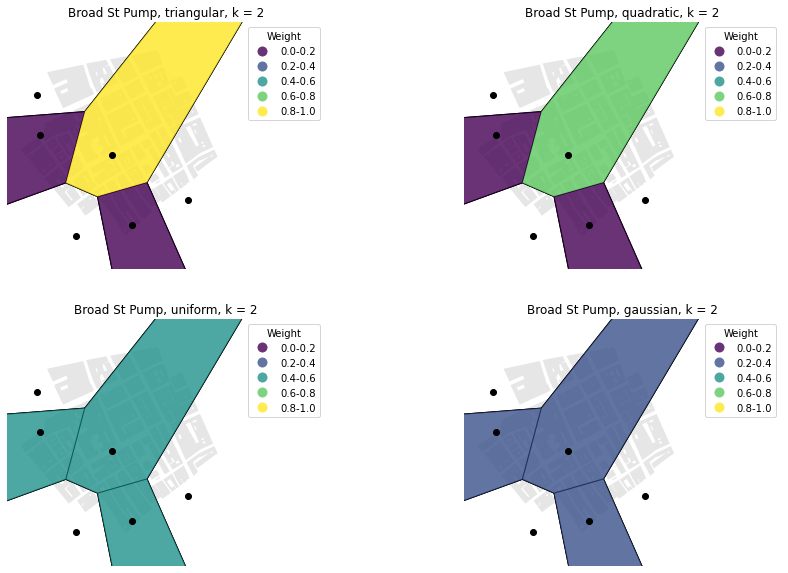

In [39]:
f, axes = plt.subplots(2,2, figsize=(15, 10))

fList = ['triangular','quadratic','uniform','gaussian']

for ax, f in zip(axes.flat, fList):
    
    blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
    
    myKernel = weights.distance.Kernel.from_dataframe(pumps, function=f, fixed=False, ids=pumps['name'].tolist())
    plotKernel(myKernel, regions_df, 'Broad St Pump', ax)
    
    pumps.plot(ax=ax, color='black')
    ax.set_xlim(529100,530000)
    ax.set_ylim(180700,181400) 

## Credits!

### Contributors:
The following individual(s) have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk).

### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).